# Les imports usuels

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

EDA = Exploratory Data Analysis

In [5]:
url = 'https://bit.ly/iris-dataset-training'
df = pd.read_csv(url)
df.shape

(150, 5)

In [6]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [15]:
df[df.duplicated(keep = False)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


# Les Histogrammes
Connaître la distribution des valeurs (outils de base)

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

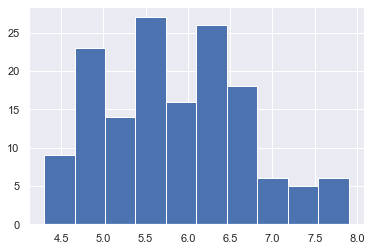

In [23]:
plt.hist(df['sepal length (cm)']) # ;

Array 1 : Nombre de bin

Array 2 : Taille des bin

12


(array([ 5., 11., 25., 11., 21., 16., 19., 14., 15.,  6.,  2.,  5.]),
 array([4.3, 4.6, 4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. , 7.3, 7.6, 7.9]),
 <BarContainer object of 12 artists>)

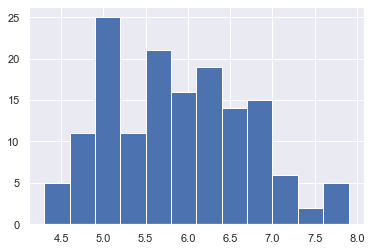

In [32]:
serie = df['sepal length (cm)']
n = serie.count()
n_bins = np.sqrt(n).astype(int)
print(n_sqrt)

plt.hist(serie, bins = n_bins)

Binning Bias = Ce qui défini la forme de l'histogramme en fonction des bins

In [33]:
serie.min()

4.3

In [34]:
serie.max()

7.9

In [37]:
bins = np.arange(4, 8, 0.25)

(array([ 0.,  4.,  7., 11., 23.,  7., 21., 10., 16., 16., 15.,  7.,  5.,
         2.,  5.]),
 array([4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  , 6.25, 6.5 ,
        6.75, 7.  , 7.25, 7.5 , 7.75]),
 <BarContainer object of 15 artists>)

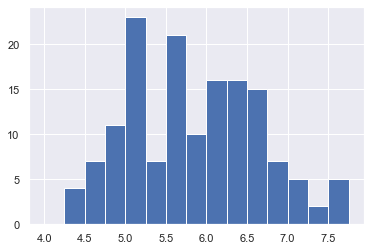

In [40]:
plt.hist(serie, bins = bins)

In [45]:
# ...
setosa = df.species == 'setosa'
versicolor = df.species == 'versicolor'
virginica = df.species == 'virginica'

In [58]:
# Création des bins
n_bins = np.sqrt(150).astype(int)
bins = np.linspace(1, 7, n_bins)

Text(0.5, 1.0, 'Histogramme petal length / species')

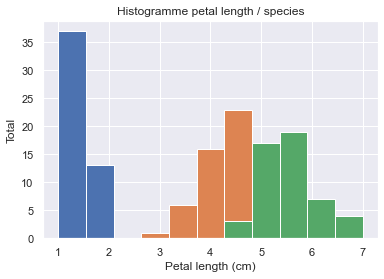

In [63]:
# Affichage des histogramme
for species in [setosa, versicolor, virginica]:
    plt.hist(df[species]['petal length (cm)'], bins = bins);
    
plt.xlabel('Petal length (cm)')
plt.ylabel('Total')
plt.title("Histogramme petal length / species")

# Bee Swarm Plot
Distribution par rapport à une classe / catégorie

In [42]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [43]:
df.species.nunique()

3

<AxesSubplot:xlabel='species', ylabel='petal length (cm)'>

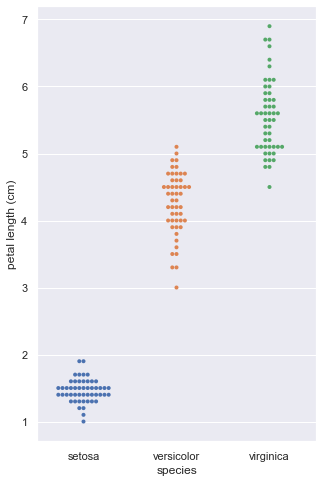

In [118]:
plt.gcf().set_size_inches(5, 8) # Changer la taille

sns.swarmplot(x = 'species', y = 'petal length (cm)', data = df, s = 3.997)

# Box Plot
Repérer les valeurs extrêmes (outliers - plages de valeur)

<AxesSubplot:xlabel='species', ylabel='petal length (cm)'>

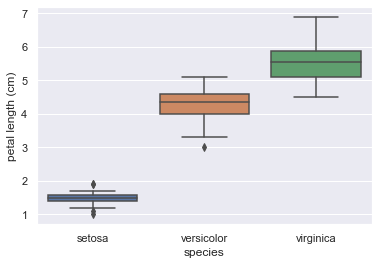

In [119]:
sns.boxplot(x = 'species', y = 'petal length (cm)', data = df)

IQR = distance entre les deux quartiles (25% | 75%) ---> Dans la box = 50% des données

- Barre supérieure de la box = 75%
- Barre médiane de la box = médiane
- Barre inférieure de la box = 25%
- Barres extrême haut / bas = Plage attendue
- Losanges noirs = Outliers

# Scatter Plot
Repérer les correlations

Text(0.5, 1.0, 'Petal length / width')

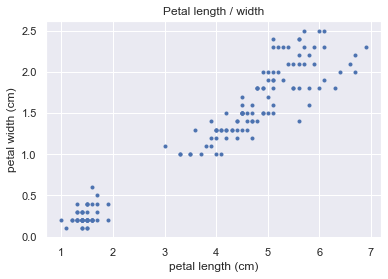

In [125]:
plt.plot(df['petal length (cm)'], 
        df['petal width (cm)'], 
        marker = '.', 
        linestyle = 'none')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Petal length / width')

Correlation positive = proportionnelle (cas ci-dessus)

Correlation négative = inversement proportionnelle

Correlation nulle = Pas de relation de proportionnalité particulière


## EDA

### Histogramme (en faisant attention à la plage de valeurs par bin)

- Se faire une idée de l'allure de la distribution de vos données

### Bee Swarm Plot (isoler les variables d'intétêts)

- Se faire une idée de l'allure de la distribution de vos données par rapport à une variable cible

### Box Plot : par rapport aux variables d'intéret

- Plage de valeur attendue, et s'il y a des outliers

### Plusieurs Scatter Plot (tester plusieurs couples)

- Repérer les correlations ou à défaut les interactions